In [3]:
import json
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

In [2]:
base_path = '/sciclone/proj-ds/geograd/stmorse/reddit/km'

In [8]:
years = range(2006, 2019+1)
months = [f'{mo:02}' for mo in range(1,13)]
yrmo = [(yr, mo) for yr in years for mo in months]
ks = [30, 50, 70, 90]

stats = []
yrmo_ = []
for k in ks:
    statline = []
    for year, month in yrmo:
        
        if year in [2014, 2015]:
            continue

        if year <= 2015:
            path = os.path.join(base_path, f"km{k}/models/stats_{year}-{month}.pkl")
            with open(path, "rb") as f:
                stat = pickle.load(f)
            statline.append(stat["avg_inertia"])
        else:
            # if k == 30:
            #     statline.append(0)
            # else:
            path = os.path.join(base_path, f"km{k}/models/wcss_{year}-{month}.json")
            with open(path, "r") as f:
                stat = json.load(f)
            statline.append(stat["avg_wcss"])
    
        if k == ks[0]:
            yrmo_.append(f"{year}-{month}")
    
    stats.append(statline)

stats = pd.DataFrame(stats, columns=yrmo_)

stats.head()

,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,0.791593,0.801370,0.807947,0.811768,0.814743,0.820447,0.813536,0.812077,0.816662,0.820102,...,0.835317,0.838757,0.835841,0.836875,0.836005,0.834026,0.834245,0.837544,0.834705,0.832220
1,0.761139,0.774968,0.785015,0.787369,0.790185,0.795873,0.789519,0.790251,0.791586,0.797988,...,0.818346,0.815441,0.817311,0.816599,0.815424,0.814462,0.815402,0.817208,0.813671,0.813495
2,0.737099,0.756581,0.764231,0.769157,0.772326,0.779261,0.772051,0.773253,0.776438,0.782580,...,0.803487,0.803582,0.802498,0.801326,0.800660,0.799643,0.801883,0.801244,0.802387,0.799209
3,0.718196,0.742863,0.751046,0.754756,0.759746,0.766576,0.761135,0.762352,0.764834,0.769444,...,0.794487,0.795263,0.790785,0.791775,0.791307,0.788396,0.791371,0.790244,0.791788,0.788964


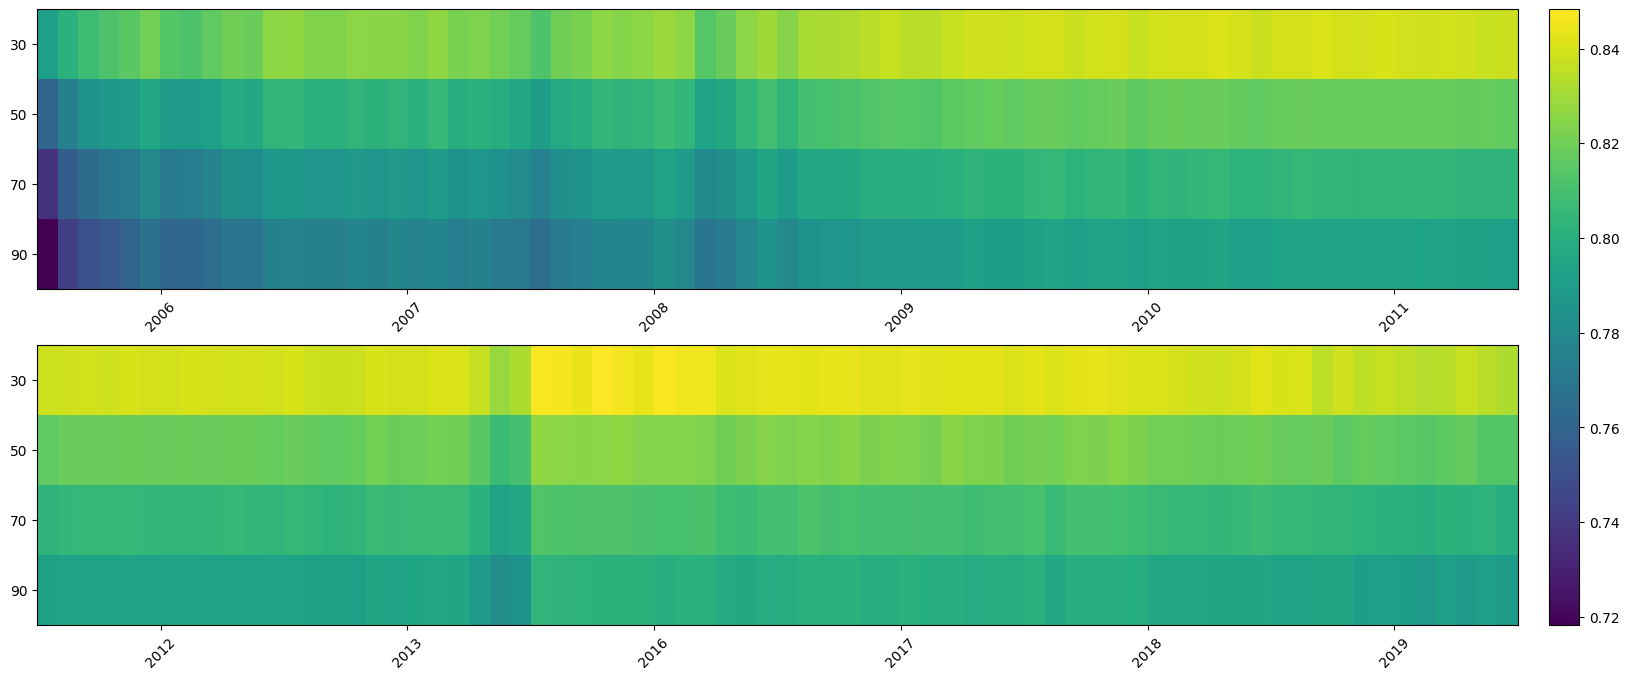

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

data = stats.values
n_cols = data.shape[1]
half = n_cols // 2
data1 = data[:, :half]
data2 = data[:, half:]

# Set common color scale
vmin = np.min(data)
vmax = np.max(data)

im1 = ax1.imshow(data1, aspect='auto', vmin=vmin, vmax=vmax)
im2 = ax2.imshow(data2, aspect='auto', vmin=vmin, vmax=vmax)

# Single colorbar spanning both axes
fig.colorbar(im1, ax=[ax1, ax2], orientation='vertical', fraction=0.025, pad=0.02)

# For ax1: use stats.columns[:half]
cols1 = stats.columns[:half]
unique_years1 = sorted(set(col.split("-")[0] for col in cols1))
year_positions1 = [np.mean([i for i, col in enumerate(cols1) if col.startswith(year)]) for year in unique_years1]

ax1.set_xticks(year_positions1)
ax1.set_xticklabels(unique_years1, rotation=45)

# For ax2: use stats.columns[half:]
cols2 = stats.columns[half:]
unique_years2 = sorted(set(col.split("-")[0] for col in cols2))
year_positions2 = [np.mean([i for i, col in enumerate(cols2) if col.startswith(year)]) for year in unique_years2]

ax2.set_xticks(year_positions2)
ax2.set_xticklabels(unique_years2, rotation=45)

for ax in [ax1, ax2]:
    ax.set_yticks(np.arange(len(ks)))
    ax.set_yticklabels(ks)

[Text(0, 0, '30'), Text(1, 0, '50'), Text(2, 0, '70'), Text(3, 0, '90')]

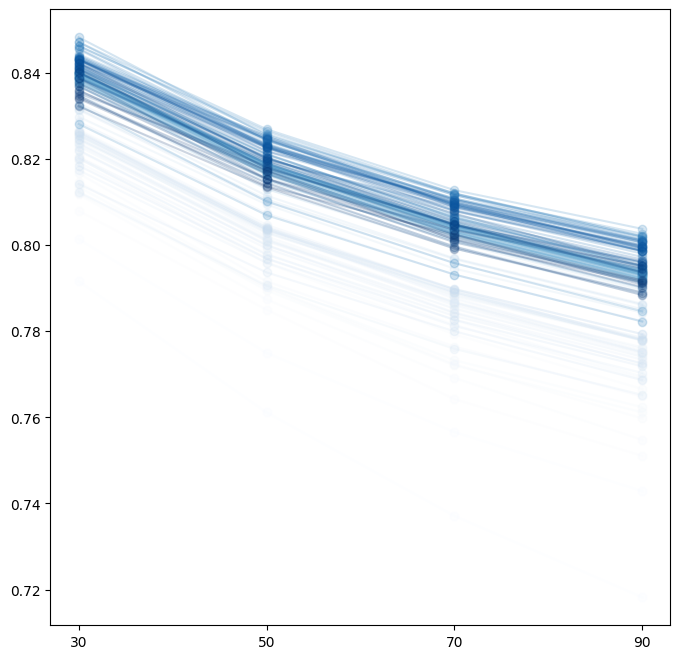

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

colors = plt.cm.Blues(np.linspace(0,1,stats.shape[1]))

for k in range(stats.shape[1]):
    ax.plot(range(4), stats.values[:,k], color=colors[k], marker='o', linestyle='-', alpha=0.2)

ax.set_xticks(range(4))
ax.set_xticklabels(ks)